<a href="https://colab.research.google.com/github/MarioBolanos/NumericalAnalysis/blob/master/3_SetConstrainedOptimization/OEE_Cap_3_MethodsPrograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regresion 

##Ejemplo 1:

In [7]:
import numpy as np
from numpy.linalg import inv 
%matplotlib inline
import matplotlib.pyplot as plt

El arreglo x guarda los días, empezamos a contar desde el 0

In [ ]:
x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]


El arreglo subs guarda la cantidad de suscriptores por día. Note que len(x)=len(subs). Aquí puedes meter tus datos para generar tus propias predicciones. Unicamente ten en cuenta que se debe mantener que len(x)=len(subs).

In [ ]:
subs=[620,626,635,644,648,652,653,656,666,675,678,682,687,693,695,697,700,703,706,708,712,716,716,722,745,814,823,812]

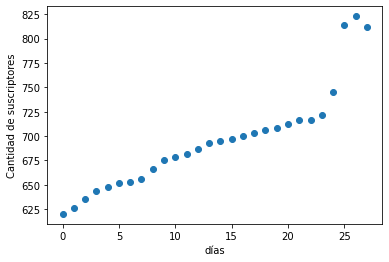

In [ ]:
plt.scatter(x, subs); plt.xlabel('días'); plt.ylabel('Cantidad de suscriptores');

Creamos el modelo:

In [ ]:

X = np.array([np.ones(len(x)), x]).T
a = inv(X.T @ X) @ X.T @ subs    ### Fórmula para minimizar los cuadrados

Hacemos la predicción:

In [ ]:
x_predict = np.linspace(0, 29, num=100)
subs_predict = a[0] + a[1] * x_predict ### Recta


a[1] indica el valor de la pendiente de la recta i.e. es el número de suscriptores promedio durante estos 28 días

In [ ]:
a[1]

5.89819376026271

Graficamos

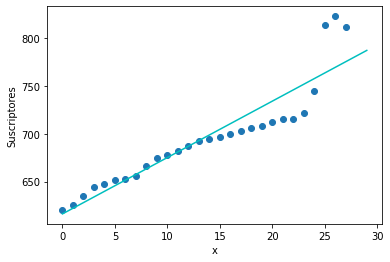

In [ ]:
plt.scatter(x, subs)
plt.xlabel('x'); plt.ylabel('Suscriptores'); plt.plot(x_predict, subs_predict, 'c');

Fórmula de la recta, donde a_1 es la pendiente,basta variar el valor de x para conocer el número de suscriptores al día x

In [ ]:
y = a[1]*(57)+a[0] ### son los 28 días(contamos desde 0) + 30 días de un mes

Imprimimos los resultados

In [ ]:
y1 = f"{y:.1f}"
print('En un mes tendré:'+ str(y1) + 'suscriptores.')

En un mes tendré:952.4suscriptores.


In [ ]:
y2 = a[1]*(106)+a[0] ## A la fecha del 14 de octubre faltan 79 días para que acabe el 2021. a 27 sumamos 79

In [ ]:
y2 = f"{y:.1f}"
print('Al finalizar 2021 tendré:'+ str(y2) + 'suscriptores.')

Al finalizar 2020 tendré:952.4suscriptores.


##Least Squares using the SVD

In [ ]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla

In [ ]:
# tall and skinny w/nullspace
np.random.seed(12)
A = np.random.randn(6, 4)
b = np.random.randn(6)
A[3] = A[4] + A[5]
A[1] = A[5] + A[1]
A[2] = A[3] + A[1]
A[0] = A[3] + A[1]


###Part I: Singular least squares using QR
Let's see how successfully we can solve the least squares problem when the matrix has a nullspace using QR:

In [ ]:
Q, R = la.qr(A)

In [ ]:
R.round(3)

array([[-4.526,  3.492, -0.204, -3.647],
       [ 0.   ,  0.796,  0.034,  0.603],
       [ 0.   ,  0.   , -1.459,  0.674],
       [ 0.   ,  0.   ,  0.   ,  0.   ]])

We can choose x_qr[3] as we please:



In [ ]:
x_qr = np.zeros(A.shape[1])

In [ ]:
x_qr[3] = 0

In [ ]:
QTbnew = Q.T.dot(b)[:3,] - R[:3, 3] * x_qr[3]
x_qr[:3] = spla.solve_triangular(R[:3,:3], QTbnew, lower=False)

Let's take a look at the residual norm and the norm of x_qr:

In [ ]:
R.dot(x_qr)-Q.T.dot(b)[:4]

array([ 0.        ,  0.        ,  0.        , -1.07977253])

In [ ]:
la.norm(A.dot(x_qr)-b, 2)

2.126715288803098

In [ ]:
la.norm(x_qr, 2)

0.8239351297413158

Choose a different x_qr[3] and compare residual and norm of x_qr.

###Part II: Solving least squares using the SVD
Now compute the SVD of  A :

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
U, sigma, VT = la.svd(A)

Make a matrix Sigma of the correct size:

In [ ]:
Sigma = np.zeros(A.shape)
Sigma[:4,:4] = np.diag(sigma)


And check that we've actually factorized A:

In [ ]:
(U.dot(Sigma).dot(VT) - A).round(4)

array([[ 0., -0.,  0.,  0.],
       [ 0.,  0., -0.,  0.],
       [ 0., -0.,  0.,  0.],
       [ 0., -0.,  0.,  0.],
       [ 0., -0.,  0.,  0.],
       [ 0., -0., -0.,  0.]])

Now define Sigma_pinv as the "pseudo-"inverse of Sigma, where "pseudo" means "don't divide by zero":

In [ ]:
Sigma_pinv = np.zeros(A.shape).T
Sigma_pinv[:3,:3] = np.diag(1/sigma[:3])
Sigma_pinv.round(3)

array([[0.147, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.624, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.055, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

In [ ]:
x_svd = VT.T.dot(Sigma_pinv).dot(U.T).dot(b)

In [ ]:
la.norm(A.dot(x_svd)-b, 2)

2.1267152888030982

In [ ]:
la.norm(x_svd)

0.7735494301489583

What do you observe about  ∥x_svd∥2  compared to  ∥x_qr∥2 ?
Is  ∥x_svd∥2  compared to  ∥x_qr∥2 ?

# Least squares


Consider a wireless communication channel in Fig. 3.6 with transmit power $p_t$. The received power pr in decibel ($dB$) is derived using the model:

> $p_r = p_t + K − 10\gamma log_{10} d$

where K is a constant depending on the radio frequency and antennas gains, $\gamma$ is the path loss exponent, and $d$ in meters is the distance between the transmitter and the receiver. In a set of empirical measurements of $pr−pt$ in $dB$, given in Table 3.1, find constants $K$ and $\gamma$ to minimize the mean square error between the model and the empirical measurements.

Let’s define $M_{model} = p_r−p_t = K−10\gamma log_{10} d$ and $M_{measure} = p_r−p_t$ given in Table 3.1.
The mean square error is

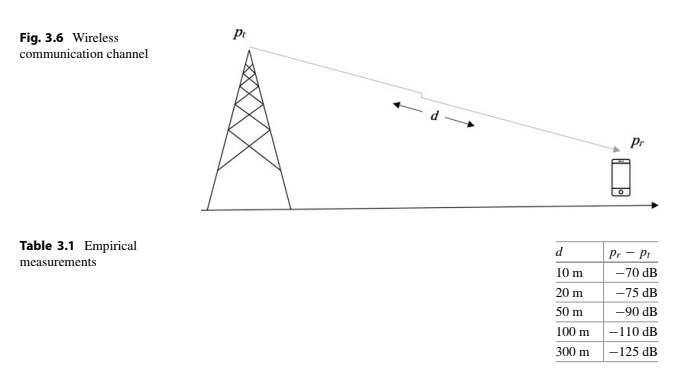

$b=Ax$




$M_{measure}=\begin{bmatrix}
1 & -10log_{10}d
\end{bmatrix}\begin{bmatrix}
K \\ \gamma
\end{bmatrix}$


$\begin{bmatrix}
 -70 \\ -75 \\ -90 \\ -110 \\ -125 
\end{bmatrix}=\begin{bmatrix}
  1 & -10log_{10}10\\
  1 & -10log_{10}20\\
  1 & -10log_{10}50\\
  1 & -10log_{10}100\\
  1 & -10log_{10}300
\end{bmatrix}\begin{bmatrix}
 K \\ \gamma
\end{bmatrix}$

$\begin{matrix}
A=\begin{bmatrix}
  1 & -10log_{10}10\\
  1 & -10log_{10}20\\
  1 & -10log_{10}50\\
  1 & -10log_{10}100\\
  1 & -10log_{10}300
\end{bmatrix} & x=\begin{bmatrix}
 K \\ \gamma
\end{bmatrix} & b =\begin{bmatrix}
 -70 \\ -75 \\ -90 \\ -110 \\ -125 
\end{bmatrix}
\end{matrix}
$

$x^*=(A^T A)^{−1}A^T b,$

## Programación de los metodos

In [ ]:
import numpy as np
import math

In [ ]:
def LSO(A,b): #Least square optimization
  return np.linalg.pinv(A)@b


## Ejecución del ejemplo

In [ ]:
A = np.array([[1 ,- 10*math.log10(10)], 
     [1 ,- 10*math.log10(20)],
     [1 ,- 10*math.log10(50)],
     [1 ,- 10*math.log10(100)],
     [1 ,- 10*math.log10(300)]])



In [ ]:
b = np.array([[-70],
    [-75],
    [-90],
    [-110],
    [-125]])

In [ ]:
LSO(A,b)

array([[-26.7439583 ],
       [  3.96691516]])

#Steepest Descent Method

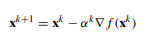

## Programación del método

In [1]:
from scipy import optimize

### Gradiente desendiente paso fijo

In [2]:
def gd1(x, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  #Entradas:
    #x: x0 valor inicial. 
    #a: tamaño de paso fijo
    #max_iter: número máximo de iteraciones permitidas.
    #epsi: tolerancia del método
  #Salidas:
    #xs: vector con los xk hallados
    #i+1: número de iteraciones realizadas
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter): #iterar hasta maximo número de iteraciones
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x
      error = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if error < epsi:
        break
  return xs,i+1

### Gradiente desendente paso optimizado

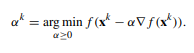

In [3]:
def gd2(x, max_iter, epsi): #Gradiente desendiente paso optimizado. 
  #Entradas:
    #x: x0 valor inicial. 
    #max_iter: número máximo de iteraciones permitidas.
    #epsi: tolerancia del método
  #Salidas:
    #xs: vector con los xk hallados
    #i+1: número de iteraciones realizadas

  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x  

  for i in range(max_iter): #iterar hasta maximo número de iteraciones
    g = grad(x[0],x[1]) #Cálculo del gradiente de xk

    def phi(s): #Función a minimiza para hallar tamaño de paso óptimo
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10) #Método para encontrar el tamaño de paso óptimo

    x = x - a * g #Cálculo de x_{k+1}
    xs[i+1,:] = x

    error = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1]))) #Cálculo del error
    if error < epsi: #Verificar error
      break
  return xs,i+1

## Example 8
Find the minimizer of $f (x) = x_1e^{−(x_1^2+x_2^2 )}$.

In [4]:
def f(x1,x2): #Función objetivo
    return x1*np.exp(-x1**2-x2**2)

In [5]:
def grad(x1,x2): #Gradiente de f
    return np.array([-2*x1**2*np.exp(-x1**2 - x2**2) + np.exp(-x1**2 - x2**2), -2*x1*x2*np.exp(-x1**2 - x2**2)])

### Gradiente desendente paso fijo



In [22]:
x = np.array([-1,1])
max_iter = 100
epsi = 0.0000001;
a = 0.25

In [20]:
xs1,i1 = gd1(x, a, max_iter,epsi)

-0.707 0.0


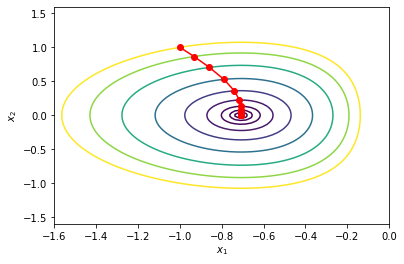

In [21]:
xx = np.linspace(-1.6, 0, 64)
yy = np.linspace(-1.6, 1.6, 128)
X, Y = np.meshgrid(xx, yy)
Z = X*np.exp(-X**2-Y**2)
function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs1[i1,0].round(3),xs1[i1,1].round(3))

Text(0, 0.5, 'f(x)')

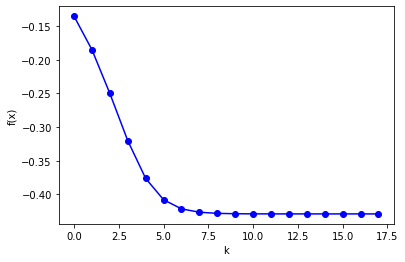

In [23]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### Gradiente desendente paso optimizado

In [24]:
x = np.array([-1,1])
epsi = 0.000001;
max_iter = 1000

In [25]:
xs2,i2 = gd2(x, max_iter, epsi)

-0.7072065691574227 0.000399155836924266


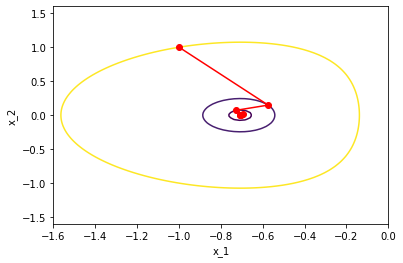

In [26]:
xx = np.linspace(-1.6, 0, 64)
yy = np.linspace(-1.6, 1.6, 128)
X, Y = np.meshgrid(xx, yy)
Z = X*np.exp(-X**2-Y**2)
function_value=f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs2[i2,0],xs2[i2,1])

Text(0, 0.5, 'f(x)')

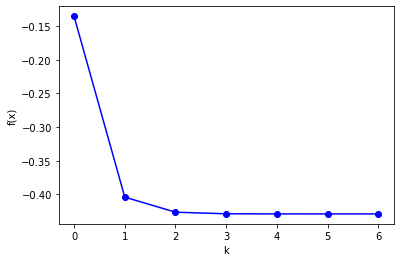

In [27]:
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

## Example 9
Find the minimizer of $f (x) = 0.06e^{2x_1+x_2} + 0.05e^{x_1−2x_2} + e^{−x1}$.

In [ ]:
def f(x1,x2): #Función objetivo
    return 0.06*np.exp(2*x1+x2) + 0.05*np.exp(x1-2*x2) + np.exp(-x1)

In [ ]:
def grad(x1,x2): #Gradiente de f
    return np.array([-np.exp(-x1) + 0.12*np.exp(2*x1 + x2) + 0.05*np.exp(x1 - 2*x2), 0.06*np.exp(2*x1+x2) - 0.1*np.exp(x1-2*x2)])

### Gradiente desendente paso fijo



In [ ]:
x = np.array([-0.5,2])
max_iter = 1000
epsi = 0.00001;
a = 0.25

In [ ]:
xs1,i1 = gd1(x, a, max_iter,epsi)

0.6453045167604988 -0.03614193131708472


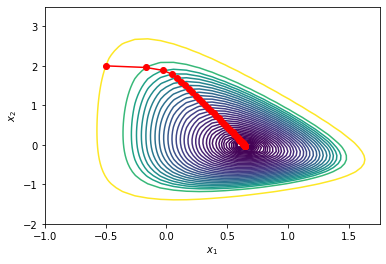

In [ ]:
xx = np.linspace(-1, 1.75, 27)
yy = np.linspace(-2, 3.5, 55)
X, Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X+Y) + 0.05*np.exp(X-2*Y) + np.exp(-X)
function_value=f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs1[i1,0],xs1[i1,1])

Text(0, 0.5, 'f(x)')

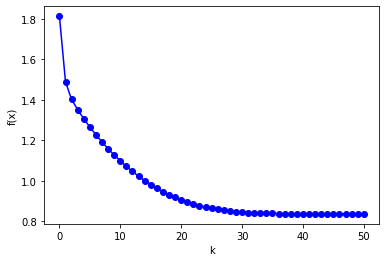

In [ ]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### Gradiente desendente paso optimizado

In [ ]:
x = np.array([-0.5,2])
epsi = 0.001;
max_iter = 1000

In [ ]:
xs2,i2 = gd2(x, max_iter, epsi)

0.6458865589511575 -0.028235701492649593


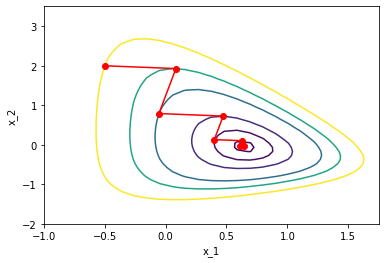

In [ ]:
xx = np.linspace(-1, 1.75, 27)
yy = np.linspace(-2, 3.5, 55)
X, Y = np.meshgrid(xx, yy)
Z = 0.06*np.exp(2*X+Y) + 0.05*np.exp(X-2*Y) + np.exp(-X)

function_value=f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))

plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs2[i2,0],xs2[i2,1])

Text(0, 0.5, 'f(x)')

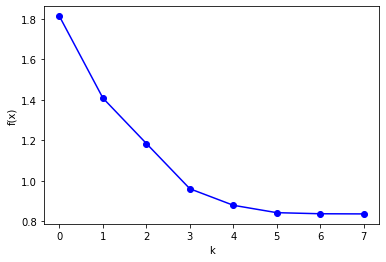

In [ ]:
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

#Newton's method
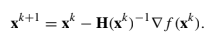


## Programación del método

In [ ]:
from scipy import optimize

In [ ]:
def nm(x, max_iter, epsi): #Método de Newton   
  #Entradas:
    #x: x0 valor inicial. 
    #max_iter: número máximo de iteraciones permitidas.
    #epsi: tolerancia del método
  #Salidas:
    #xs: vector con los xk hallados
    #i+1: número de iteraciones realizadas 
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x
  for i in range(max_iter):
      Hk = H(x[0],x[1]) #Inversa de la matriz Hessiana evaluada en xk
      x = x - np.linalg.inv(Hk)@grad(x[0],x[1]) #Cálculo x_{k+1}
      xs[i+1,:] = x
      error = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1]))) #Cálculo del error
      if error < epsi: #Verifiación del error
        break
  return xs,i+1

## Example 10
Find the minimizer of $f (x) = − ln(1−x_1−x_2)−ln(x_1)−ln(x_2)$.

In [ ]:
def f(x1,x2): #Función objetivo
    return -np.log(1-x1-x2) - np.log(x1) - np.log(x2)

In [ ]:
def grad(x1,x2): #Gradiente de f
    return np.array([-1/x1 + 1/(1 - x1 - x2), -1/x2 + 1/(1 - x1 - x2)])

In [ ]:
def H(x1,x2): #Hessiana de f
  return np.array([[1/x1**2 + 1/(1 - x1 - x2)**2, 1/(1 - x1 - x2)**2],[1/(1 - x1 - x2)**2, 1/x2**2 + 1/(1 - x1 - x2)**2]])

In [ ]:
x = np.array([1/8,1/3])
max_iter = 1000
epsi = 0.001;

In [ ]:
xs,i = nm(x,max_iter,epsi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


0.3333258237083114 0.3333359290295141


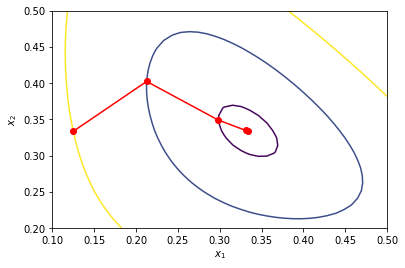

In [ ]:
xx = np.linspace(0.1, 0.5, 40)
yy = np.linspace(0.2, 0.5, 30)
X,Y = np.meshgrid(xx, yy)
Z = -np.log(1-X-Y) - np.log(X) - np.log(Y);
function_value=f(xs[0:i+1,0],xs[0:i+1,1])
c = plt.contour(X, Y, Z,np.flip(function_value))
plt.plot(xs[0:i+1,0],xs[0:i+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs[i,0],xs[i,1])

Text(0, 0.5, 'f(x)')

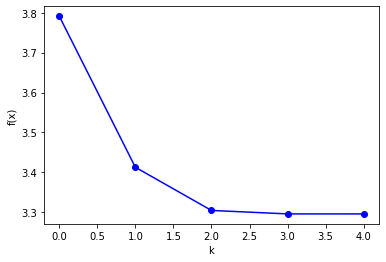

In [ ]:
plt.plot(f(xs[0:i+1,0],xs[0:i+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')